# Quantum Computing In Qiskit With Examples

In [8]:
#Outcomment to install dependencies.
#import pip
#! pip3 install qiskit
#! pip3 install matplotlib
import numpy as np
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit import execute
from IPython.display import Math
from IPython.display import Image
from IPython.core.display import HTML 

# Introduction
This notebook is constructed as a part of the Quantum Experience Hands-on session.
The purpose of this notebook is to give an introduction to all functions available in the Qiskit framework as well as give an introduction to how Quantum Computers work.

Before we start, it is important to have som basic knowledge about how quantum computers work, what we can expect from them and how they can be utilized.

# What is a Qubit?

Before we begin it is important to first talk a bit about Qubits. Qubits are used in quantum computers, like classical bits are used in classical computers. Quibits are like traditional bits in the way that they can either be 1 or 0, represented in quantum-lingo as: |0> and |1>. 

## Super position

One of the main differences between Qubits and traditional bits is that Qubits are able to be in a superposition between 1 and 0, represented mathematically as: α|0⟩ + β|1⟩

Where α and β are numbers which when added together is something no more than 1 and no less than 0. A Qubit in the superposition state is simutainiouly 0 and 1, and only when mesured, can it take the form of one of the two values

## Entanglement

Entanglement can be induced in Qubits, and means that the entanglet Qubits have an effect on each other. 
If two Qubits are entangled, their values are strictly related to each other. This means that if one of the entangled Qubits is manipulated in some way it will effect the other. This also means that if we measure one of the two we have information about the state of both of them.

# Setting up your quantum circuit

Okay. So now that we have covered the basics, it's time to make some quantum algorithms. The first thing that we need to do is to create a quantum register, a classical register and a circuit. A Quantum Register holds our Qubits, in this example we only define a single Qubit. We also need a Classical Register because when measuring a Qubit, it will always be either 1 or 0, this information is stored in the Classical Register. Finally we need a Quantum Circuit to bind the Quantum Register and the Classical Register.

In [2]:
# Creates a Quantum Register with 1 qubit.
qr = QuantumRegister(1)

# Creates a classical register to hold our measured values
cr = ClassicalRegister(1)

# Creates a Quantum Circuit 
circ = QuantumCircuit(qr,cr)

To view our circuit, we can call the circ.draw() function. This functions prints two things:

    1: q0_0: |0>    q0_0 is our single Qubit.             |0> is the value of the Qubit. 
    2: c0_0: 0      c0_0 is a classical bit.              0 is the value of the bit.
    
Qubits' always starts as a |0>.

In [3]:
circ.draw()

Below is a picture of the IBMQ Composer. This is a tool used for programming Quantum computers. It too has a Quantum Register with Qubits in it (seen as q[0], q[1], q[2] etc.) and a Classical Register that stores the measured values. (seen here as the bottom line with a "c" in front of it)

You might have noticed the colorful boxes with letters in it, to the right. These are called Gates a each one is a speciffic command that can be applied to a Qubit.

In [4]:
Image(url="https://cdn-images-1.medium.com/max/2000/1*c5NCMQAmGOQqIvRK9aiaCg.png")

# Gates

## The X Gate
The X gate flips the state of the Qubit. Meaning that a Qubit with a value of 1 becomes a 0, and vice versa. In traditional computing this can be directly related to that of a NOT gate. We can add an X gate to our circuit like so:

In [39]:
# We use our Qunatum Circuit from earlier and call it measure_x
measure_x = QuantumCircuit(qr,cr)

# Here we apply the X gate to our first and only Qubit in the Quantum Register(qr)
measure_x.x(qr[0])
measure_x.draw()

Now if we measure our Qubit it should have a value of |1>, because the Qubit was flipped from it's default state of |0> to |1>.

To measure the Qubit, we first need to run the circuit using a tool from Qiskit called the BasicAer module. Here we are using a Quantum simulator.. The real thing comes later.

In [6]:
# Import Aer framework
from qiskit import BasicAer
from qiskit.quantum_info import state_fidelity, basis_state

In [41]:
# Run the quantum circuit on a statevector simulator backend
backend = BasicAer.get_backend('qasm_simulator')

Now our circuit has run and should have flipped our Qubit. Like we added the X gate earlier we need to add a measure to the circuit.

In [42]:
# Here we append a measure to our circuit
measure_x.measure(qr[0], cr[0])

In [43]:
# Here is the circuit again, wiht the (M)easure at the end.
measure_x.draw()

Now we have added a measure to our circuit and we are ready to run our complete circuit. 

The measure will store the state of the Qubit ( |1> ) into the Classical Register, which we can view by calling the following methods:

In [10]:
result = execute(measure_x, backend).result()

In [11]:
result.get_counts(measure_x)

{'1': 1024}

You should see "{'1': 1024}" printed above. This is a printout of the Classical Register. 
All this means is that our algorithm had a 100% chance of returning a 1, as we predicted.

(why does it say 1024?: long story short, this is the computers way of telling us how certain it is of the outcome in a range from 0 to 1024. 0 = 0%, 512 = 50%, 1024 = 100%)

### Visualizing the output

Now, lets try drawing the output as a histogram, to visualize our result a little better. For this we need a few more tools:

In [12]:
from qiskit.tools.visualization import plot_histogram

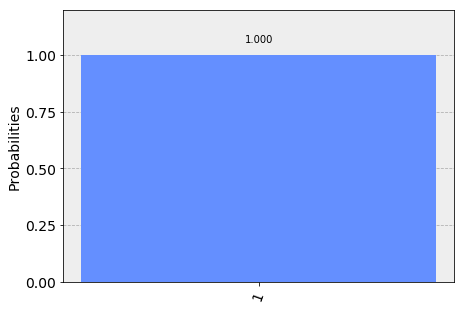

In [13]:
plot_histogram(result.get_counts(measure_x))

Again you should see a 100% probalility of a 1. Don't worry if this isn't clear yet, you will get more familiar with displaying the results later.

## The Hadamard gate (H gate)
The hadamard gate is one of the most common gates used in quantum computing, and one that you surely will get more aquainted with as you explore quantum computing. The hadamard gate transforms the state of a Qubit to and from superposition. This is often used at the start of quantum algorithms, as Qubits usually needs to be in a superposition for certain algorithms to work.

In [14]:
# We make a new Qunatum Circuite, as we did earlier, and call it measure_h
measure_h = QuantumCircuit(qr,cr)

# We append a H gate to the circuit and then draw it
measure_h.h(qr[0])
measure_h.draw()

In [15]:
# Lets measure the Qubit after the H gate has put it in superposition

# Here we append a measure
measure_h.measure(qr[0], cr[0])

# Here we run our circuit
result = execute(measure_h, backend).result()

In [16]:
counts = result.get_counts(measure_h)

In [17]:
counts

{'0': 512, '1': 512}

Last time we got the result: {'1': 1024}, now we got {'0': 512, '1': 512}, why is this?

Putting a Qubit in superposition makes it have a 50% chance of being a 1 or a 0 when measured. 

    {'1': 1024}              = 100% chance of the result being a 1.
    {'0': 512, '1': 512}     = 50% chance of 0, 50% chance of 1.
    
Lets visualize the result:

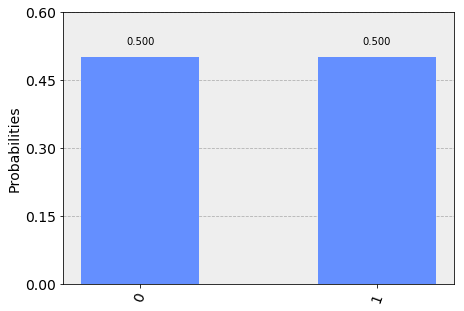

In [18]:
plot_histogram(counts)

## The C-NOT (Controlled-NOT) gate
This gate is known as a two-Qubit gate, which means that it needs two Qubits to function.

The C-NOT gate acts as an X gate, flipping the value of a certain Qubit, but only if another Qubit has the value of 1. One Qubit is the "control" Qubit and the other is the "target" Qubit. 

If the "control" Qubit is in the state |0> nothing happens to the "target", but if the "control" Qubit is in state |1> an X gate operation is applied to the "target" Qubit.

Lets demonstrate:

In [11]:
# We create a new Quantum Register with 2 qubits.
qr2 = QuantumRegister(2)

# We also need to create a classical register to hold our measured values
cr2 = ClassicalRegister(2)

# Finally the circuit:
measure_CX = QuantumCircuit(qr2,cr2)

# Here we append a C-NOT (CX) gate to our circuit
measure_CX.cx(qr2[0],qr2[1])

# Lastly the measure
measure_CX.measure(qr2, cr2)

measure_CX.draw()

In [28]:
result = execute(measure_CX, backend).result()

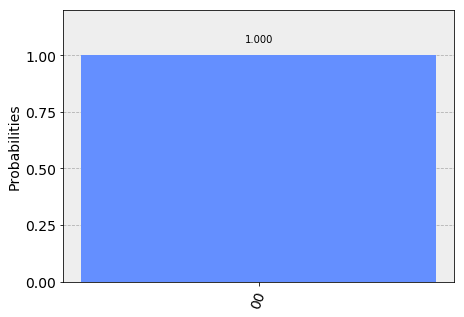

In [29]:
counts = result.get_counts(measure_CX)
plot_histogram(counts)

### What happened?

Well. not much. Remember that the default state of a Qubit is 0, and that C-NOT gates only flip Qubits when the "control" Qubit is 1? Since our input was 00 (0 for both Qubits in our Quantum Register), our output was 00 as well.

Let's try again, but this time lets add an X gate to one of out Qubits.

In [13]:
# Starting over we build a new Quantum Circuit
measure_CX = QuantumCircuit(qr2,cr2)

# This time we add an X gate to the circuits first Qubit (qr2[0] = the first Qubit)
measure_CX.x(qr2[0])

# We also add the C-NOT gate to the first Qubit (qr2[0]) which is then considered the "control". The second Qubit (qr2[1]) is regarded as the target.
measure_CX.cx(qr2[0],qr2[1])

# We add a measure of the Qubits
measure_CX.measure(qr2, cr2)

# Lastly we draw the circuit
measure_CX.draw()

In [31]:

result = execute(measure_CX, backend).result()
counts = result.get_counts(measure_CX)

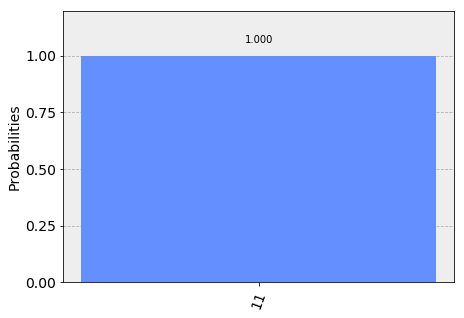

In [32]:
plot_histogram(counts)

## What happend?

Well. something. This time our input was 01 and our output was 11.

Firstly, the result (11) visualized above should be read from **right** to **left**, as in binary.
    
    First Qubit = 1, Second Qubit = 1
    
Secondly, our result ended up as 11, since our first Qubit is fliped from it's default value of 0 to a value of 1 by the X gate. Since the first Qubit is the "control" Qubit in our C-NOT gate, and the value of said Qubit is 1, it flips the "target" Qubit, the second Qubit. Giving us a result of 11. 

Now lets talk about entanglement.

### Using C-NOT gates while in superposition.

If we try to apply the C-NOT gate to our Qubits while the control Qubit is in a superposition, the two Qubits becomes entangled. This means that the stocastic outcomes between the two Qubits become correlated in all future operations.

In [33]:
measure_CX_SP = QuantumCircuit(qr2,cr2)
# We add a hadamard gate to place our control Qubit in a superposition
measure_CX_SP.h(qr2[0])
# We add a X gate to flip the control bit
measure_CX_SP.x(qr2[0])
# A Controlled-NOT gate with Qubit 0 as the control, and Qubit 1 as the target.
measure_CX_SP.cx(qr2[0],qr2[1])
# We draw the circuit
measure_CX_SP.draw()

In [34]:
measure_CX_SP.h(qr2[0])
measure_CX_SP.draw()

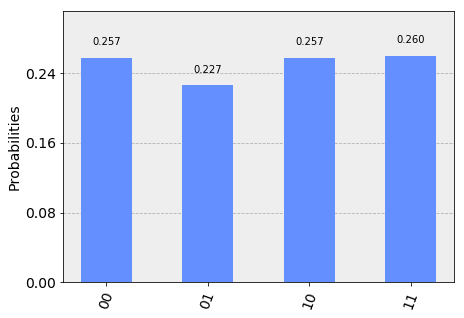

In [35]:
measure_CX_SP.measure(qr2, cr2)
result = execute(measure_CX_SP, backend).result()
counts = result.get_counts(measure_CX_SP)
plot_histogram(counts)

### What happened? 

The entaglement of the bits are closely related, and therefore the measurement of one bit will give the result of the other. Therefore the properbility of one outcome is defined as 1/n where n = entagled Qubits.

# Running your code on a real Quantum Computer

As you may have noticed, all our tests up until now have only been running on a simulation. This is known as the 'qasm_simulator', which is defined in our backend.

In [36]:
BasicAer.get_backend('qasm_simulator')

<QasmSimulatorPy('qasm_simulator') from BasicAer()>

The simulator is fine for running most basic quantum circuits, since the outcomes of these calculations are already known. But if you want to develop new algorithms or try out the later example we will need to run them on a real machine. 

To run our calculations on a existing quantum computer, we must first import IBMQ 

In [37]:
from qiskit import IBMQ

In the root of your directory, a file can be found named "credentials.py", this is where you write the your API key credentials which can be found at https://quantumexperience.ng.bluemix.net/qx/account/advanced.

In [38]:
%run credentials.py
API_Token;

ERROR:root:File `'credentials.py'` not found.


NameError: name 'API_Token' is not defined

If you are running this in a container, or it for some reason does not work, please remove the comments from the following and paste in your api key.

In [ ]:
# API_Token = "<Your_Key_Here>"

In [ ]:
# We now save the account so we can use it with IBMQ
IBMQ.save_account(API_Token)
# And now we register which account we are using.
IBMQ.load_accounts()

### Choosing a backend
As mentioned before, the qasm simulator is only one of a handfull of available backends to use for running our quantum programs. Too see all available backends, we can run the following code.

In [ ]:
# Get list of available backends
IBMQ.backends()

In [ ]:
# We choose the backend that we want to use.
#device = IBMQ.get_backend('ibmqx4')
# But for the sake of speed we will use the least busy one
from qiskit.providers.ibmq import least_busy
device = least_busy(IBMQ.backends(simulator=False))
device

In [ ]:
# We can now Generate a quantum circuit like before.
q = QuantumRegister(1)
c = ClassicalRegister(1)
qc = QuantumCircuit(q, c)

In [ ]:
# We add an x gate at q0
qc.x(q[0])

In [ ]:
# And add a measure to our Qubit.
measure = qc.measure(q, c)

In [ ]:
qc.draw()

In [ ]:
from qiskit.tools.monitor import job_monitor

# We excecute the job on the choosen device
job_sim = execute(qc, device)
# The job monitor makes it possible for us to monitor our job in real time
job_monitor(job_sim, monitor_async=True)

After a couple of seconds you should see an output with the status of your job in the cell above. this can take some time depending on how busy the machines are. So grab a cup of coffee, or continue on while we wait.

In [ ]:
# When the job is done, the results can be showed below.
sim_result = job_sim.result()
counts = sim_result.get_counts(qc)

In [ ]:
plot_histogram(counts)

# Quantum algorithms

## Random number generation